dendrogram 

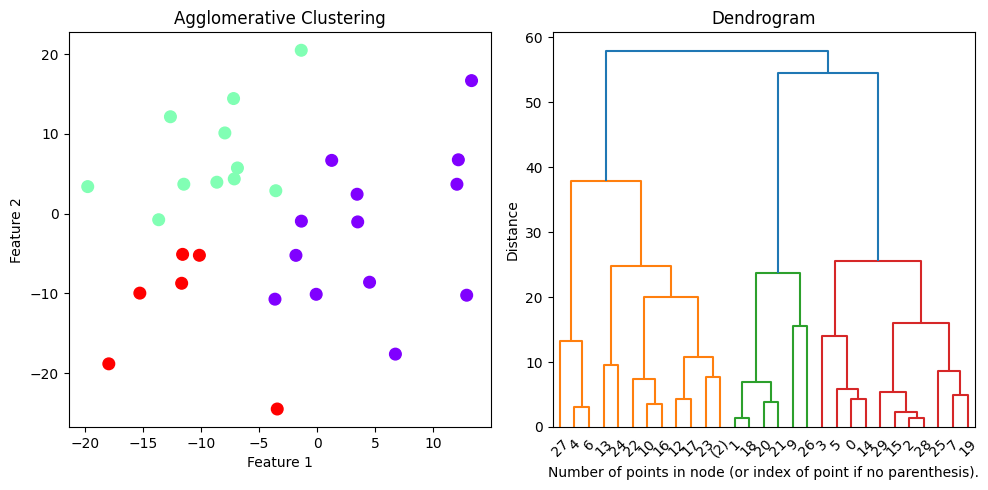

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=10)

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg=AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)  


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i ,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow',s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Hierarchial Divisive clustering 

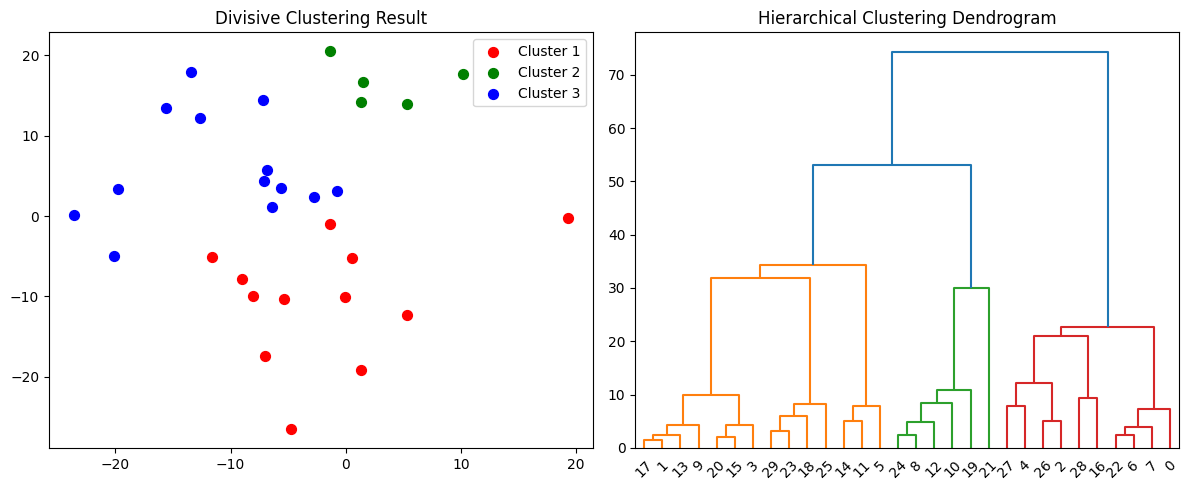

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=30, centers=5, cluster_std=10, random_state=42)

def divisive_clustering(data, max_clusters=3):
    # Initialize clusters with all data as one cluster
    clusters = [data]

    while len(clusters) < max_clusters:
        # Pick the largest cluster to split
        cluster_to_split = max(clusters, key=lambda x: len(x))
        clusters.remove(cluster_to_split)  # <-- fixed (removed comma)

        # Split using KMeans into 2 parts
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        cluster1 = cluster_to_split[kmeans.labels_ == 0]
        cluster2 = cluster_to_split[kmeans.labels_ == 1]

        # Add the new clusters
        clusters.extend([cluster1, cluster2])
    
    return clusters

# Run divisive clustering
clusters = divisive_clustering(X, max_clusters=3)

# Plot results
plt.figure(figsize=(12, 5))

# Divisive clustering result
plt.subplot(1, 2, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, c=colors[i % len(colors)], label=f'Cluster {i+1}')
plt.title('Divisive Clustering Result')
plt.legend()

# Dendrogram using Ward linkage
linked = linkage(X, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()
